# Sentiment Analysis Project 

## **Objective**
This project aims to analyze text data and classify it into **Positive, Negative, or Neutral** sentiments using **Natural Language Processing (NLP)** techniques.

## **Dataset Overview**
We will be working with a dataset containing text samples labeled with their corresponding sentiments. The main steps in this project include:
1. **Data Exploration & Cleaning** 
2. **Feature Extraction (Text Vectorization)** 
3. **Model Training & Evaluation** 
4. **Final Insights & Results** 

Let's get started! 


In [116]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [118]:
# Load the dataset
df = pd.read_csv("sentiment_analysis.csv")

# Display basic information about the dataset
df.info()

# Show the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [120]:
df.shape

(499, 7)

In [122]:
#some statistics 
df.describe()

,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


##  Exploratory Data Analysis (EDA)

Before diving into model training, we need to explore the dataset to understand its structure, identify potential issues, and gain insights.

### **Checking for Missing Values**
We will check if there are any missing values in the dataset that need to be handled.

### **Sentiment Distribution**
Understanding how the sentiment labels are distributed helps us determine if the dataset is balanced or imbalanced.

### ** Data Visualization**
A bar chart will be used to visualize the frequency of each sentiment class.

### ** Sample Text Exploration**
Reviewing some text samples will give us an idea of the dataset's content and potential preprocessing needs.

Let's explore the dataset! 


In [125]:
# Check for missing values
df.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [127]:
# Count the number of instances for each sentiment category
df['sentiment'].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

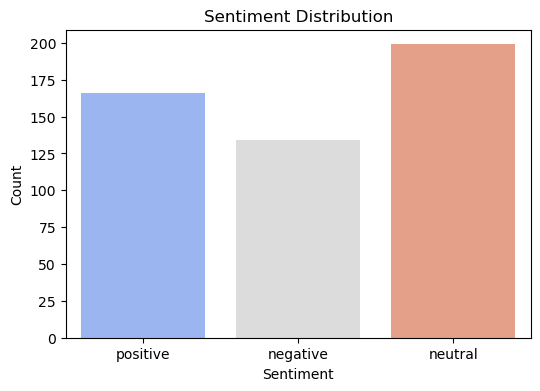

In [129]:
#lets visualize the sentiment distribution.
# Plot the sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [131]:
#let's examine the actual text data to understand what kind of text we're dealing with.
# Show some random text samples
df[['text', 'sentiment']].sample(5, random_state=42)

,text,sentiment
460,'there are people and then there are pencils'...,neutral
73,Soooo high,neutral
231,"Screw the reviews, I thought Wolverine was awe...",positive
175,Hell Yeah!,neutral
237,Always have wanted to go to Oz,neutral


Nice! From these samples, we can already see some important things:

 Informal language: Short phrases like "Hell Yeah!"
 Sentiment-related words: "awe..." suggests positivity
 Context-dependent meaning: "Soooo high" could have different meanings

We will need text preprocessing to clean and standardize this data before training a model.



 Data Preprocessing  

To prepare the text data for modeling, we need to clean and normalize it. The steps include:  

 **Lowercasing** - Convert all text to lowercase for consistency.  
 **Removing Special Characters & Punctuation** - Keep only meaningful words.  
 **Removing Stopwords** - Eliminate common words like *"the", "and", "is"*.  
 **Tokenization** - Split text into individual words.  
 **Lemmatization** - Convert words to their root form (*running → run*).  

Now, let's preprocess the data! 


In [135]:
#Converting all text to lowercase ensures consistency and avoids treating "Good" and "good" as different words.
# Convert text to lowercase
df['text'] = df['text'].str.lower()

# Show some samples after lowercasing
df[['text', 'sentiment']].sample(5, random_state=42)


,text,sentiment
460,'there are people and then there are pencils'...,neutral
73,soooo high,neutral
231,"screw the reviews, i thought wolverine was awe...",positive
175,hell yeah!,neutral
237,always have wanted to go to oz,neutral


In [137]:
#Removing Special Characters & Punctuation
# Function to remove special characters & punctuation
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply the function
df['text'] = df['text'].apply(clean_text)

# Show some samples after cleaning
df[['text', 'sentiment']].sample(5, random_state=42)


,text,sentiment
460,there are people and then there are pencils s...,neutral
73,soooo high,neutral
231,screw the reviews i thought wolverine was awes...,positive
175,hell yeah,neutral
237,always have wanted to go to oz,neutral


In [139]:
#Removing Stopwords
#Stopwords are common words like "the", "and", and "is" that don’t add much meaning to sentiment analysis.
# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

# Apply the function
df['text'] = df['text'].apply(remove_stopwords)

# Show some samples after removing stopwords
df[['text', 'sentiment']].sample(5, random_state=42)


,text,sentiment
460,people pencils sharp sharpened pencil philosophy,neutral
73,soooo high,neutral
231,screw reviews thought wolverine awesome enough...,positive
175,hell yeah,neutral
237,always wanted go oz,neutral


In [141]:
from nltk.tokenize import word_tokenize

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Apply the function
df['text'] = df['text'].apply(tokenize_text)

# Show some samples after tokenization
df[['text', 'sentiment']].sample(5, random_state=42)


,text,sentiment
460,"[people, pencils, sharp, sharpened, pencil, ph...",neutral
73,"[soooo, high]",neutral
231,"[screw, reviews, thought, wolverine, awesome, ...",positive
175,"[hell, yeah]",neutral
237,"[always, wanted, go, oz]",neutral


In [143]:
#Now let's move to lemmatization, which helps in reducing words to their root forms. Run the following code and show me the results:
# Initialize the lemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize_words(text):
    return [lemmatizer.lemmatize(word) for word in text]

# Apply lemmatization
df['text'] = df['text'].apply(lemmatize_words)

# Display sample data
df[['text', 'sentiment']].head()


,text,sentiment
0,"[great, day, look, like, dream]",positive
1,"[feel, sorry, miss, sea, beach]",positive
2,"[dont, angry]",negative
3,"[attend, class, listening, teacher, reading, s...",negative
4,"[want, go, let, go]",negative


# Feature Engineering (FE)

## 1. Bag of Words (BoW)
- Convert text data into a numerical representation using word counts.

## 2. TF-IDF (Term Frequency-Inverse Document Frequency)
- Assign weights to words based on their importance in the dataset.

## 3. Word Embeddings
- Use pre-trained embeddings like Word2Vec, GloVe, or FastText to represent words in a dense vector space.

## 4. N-grams
- Capture more context by considering sequences of words (bigrams, trigrams, etc.).

## 5. POS Tagging
- Extract part-of-speech (POS) tags to understand the grammatical structure.

## 6. Sentiment Scores
- Add additional sentiment-based features to enhance model performance.

## 7. Custom Features (Optional)
- Any additional domain-specific features that may help in classification.


In [146]:
#Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer

# Initialize BoW model
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['text'].apply(lambda x: ' '.join(x)))  # Joining tokens back to string

# Convert to DataFrame
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.head()


,aaaaaah,aaaaaw,aawww,accenditenly,accepts,according,account,achievement,act,actress,...,yet,yor,youd,youll,youre,youtube,youve,yum,zero,â½s
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
#TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF model
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text'].apply(lambda x: ' '.join(x)))

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()


,aaaaaah,aaaaaw,aawww,accenditenly,accepts,according,account,achievement,act,actress,...,yet,yor,youd,youll,youre,youtube,youve,yum,zero,â½s
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
#Word Embeddings (Word2Vec)
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['text'], vector_size=100, window=5, min_count=1, workers=4)

# Convert sentences to word vectors by averaging word embeddings
def get_word2vec(sentence, model):
    words = [word for word in sentence if word in model.wv]
    if len(words) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[words], axis=0)

df['word2vec'] = df['text'].apply(lambda x: get_word2vec(x, word2vec_model))
df.head()


,Year,Month,Day,Time of Tweet,text,sentiment,Platform,word2vec
0,2018,8,18,morning,"[great, day, look, like, dream]",positive,Twitter,"[-0.004808538, 0.0017874707, -0.0032751113, 0...."
1,2018,8,18,noon,"[feel, sorry, miss, sea, beach]",positive,Facebook,"[0.0025636791, 0.0015334745, 0.0026030159, -0...."
2,2017,8,18,night,"[dont, angry]",negative,Facebook,"[0.002131111, 0.0006526016, 0.0063921087, 0.00..."
3,2022,6,8,morning,"[attend, class, listening, teacher, reading, s...",negative,Facebook,"[0.0006677806, 0.0021947473, 1.8448303e-05, -0..."
4,2022,6,8,noon,"[want, go, let, go]",negative,Instagram,"[0.0017191241, 0.001162442, -0.0021315368, 0.0..."


In [152]:
#N-grams (Bigrams & Trigrams)
from sklearn.feature_extraction.text import CountVectorizer

# Using Bigrams & Trigrams
ngram_vectorizer = CountVectorizer(ngram_range=(2,3))  # Extracts bigrams & trigrams
X_ngrams = ngram_vectorizer.fit_transform(df['text'].apply(lambda x: ' '.join(x)))

# Convert to DataFrame
ngrams_df = pd.DataFrame(X_ngrams.toarray(), columns=ngram_vectorizer.get_feature_names_out())
ngrams_df.head()


,aaaaaw want,aaaaaw want live,accenditenly click,accenditenly click restart,accepts appology,according quarter,according quarter family,account im,account im little,act like,...,youre going,youre going come,youre missing,youre missing bb,youtube tutorial,youve put,youve put one,zero funny,â½s day,â½s day mom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
# POS Tagging (Part of Speech)
import nltk
from nltk import pos_tag

# POS tagging function
df['pos_tags'] = df['text'].apply(lambda x: pos_tag(x))  # Tag each token
df[['text', 'pos_tags']].head()


,text,pos_tags
0,"[great, day, look, like, dream]","[(great, JJ), (day, NN), (look, VBP), (like, I..."
1,"[feel, sorry, miss, sea, beach]","[(feel, NN), (sorry, JJ), (miss, VBP), (sea, N..."
2,"[dont, angry]","[(dont, NN), (angry, JJ)]"
3,"[attend, class, listening, teacher, reading, s...","[(attend, JJ), (class, NN), (listening, VBG), ..."
4,"[want, go, let, go]","[(want, NN), (go, VB), (let, NN), (go, VB)]"


In [156]:
#Sentiment Scores
from textblob import TextBlob

# Function to extract sentiment polarity
def get_sentiment(text):
    return TextBlob(' '.join(text)).sentiment.polarity

df['sentiment_score'] = df['text'].apply(get_sentiment)
df[['text', 'sentiment_score']].head()


,text,sentiment_score
0,"[great, day, look, like, dream]",0.8
1,"[feel, sorry, miss, sea, beach]",-0.5
2,"[dont, angry]",-0.5
3,"[attend, class, listening, teacher, reading, s...",0.0
4,"[want, go, let, go]",0.0


In [158]:
#Custom Features (Example: Text Length & Unique Word Count)
# Adding custom features
df['text_length'] = df['text'].apply(lambda x: len(x))  # Number of words
df['unique_words'] = df['text'].apply(lambda x: len(set(x)))  # Unique word count

df[['text', 'text_length', 'unique_words']].head()


,text,text_length,unique_words
0,"[great, day, look, like, dream]",5,5
1,"[feel, sorry, miss, sea, beach]",5,5
2,"[dont, angry]",2,2
3,"[attend, class, listening, teacher, reading, s...",7,7
4,"[want, go, let, go]",4,3


# **Model Training & Evaluation**

## **1. Splitting the Data**
Before training any model, we split the dataset into training and testing sets to evaluate the model’s performance on unseen data.

## **2. Training Machine Learning Models**
We will train multiple machine learning models to classify the text into different sentiment categories. The models we will experiment with include:
- **Logistic Regression**
- **Random Forest**
- **Naive Bayes**
- **Support Vector Machine (SVM)**

## **3. Evaluating Model Performance**
To assess how well our models perform, we will use the following metrics:
- **Accuracy**: The proportion of correctly classified instances.
- **Precision**: The ability of the model to avoid false positives.
- **Recall**: The ability of the model to find all positive instances.
- **F1-Score**: The balance between precision and recall.
- **Confusion Matrix**: A matrix showing correct and incorrect classifications.

We will compare the models based on these metrics and select the best-performing one.


In [188]:
#Splitting the Data
# Define features and target
X = df['text']
y = df['sentiment']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (399,)
Testing data shape: (100,)


In [190]:
#Convert each list of words back into a single string:
X_train = X_train.apply(lambda words: ' '.join(words) if isinstance(words, list) else str(words))
X_test = X_test.apply(lambda words: ' '.join(words) if isinstance(words, list) else str(words))


In [192]:
print(type(X_train))
print(type(X_test))
print(X_train[:5])  # Print first 5 elements to check structure


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
263    good news finally finished workout paused hour...
62                                   one suggestion date
163    since demise woolworth isnt easy find reasonab...
437                 slipped caught flu feeling like poop
480    bumping dj opus drunk car lmao dont act like u...
Name: text, dtype: object


In [194]:
from gensim.models import Word2Vec

# Train Word2Vec on your dataset
w2v_model = Word2Vec(sentences=X_train, vector_size=300, window=5, min_count=2, workers=4)

# Convert sentences to average word embeddings
def get_avg_w2v(sentence, model):
    words = [word for word in sentence if word in model.wv]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[words], axis=0)

X_train_w2v = np.array([get_avg_w2v(sentence, w2v_model) for sentence in X_train])
X_test_w2v = np.array([get_avg_w2v(sentence, w2v_model) for sentence in X_test])


In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),  # Use unigrams, bigrams, and trigrams
    max_features=5000,   # Increase vocabulary size
    stop_words='english' # Remove stopwords to reduce noise
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [202]:
from scipy.sparse import hstack

X_train_combined = hstack([X_train_tfidf, X_train_w2v])
X_test_combined = hstack([X_test_tfidf, X_test_w2v])

Training SVM...
=== SVM Model Performance ===
Accuracy: 0.7400
              precision    recall  f1-score   support

    negative       0.91      0.37      0.53        27
     neutral       0.67      0.93      0.78        40
    positive       0.79      0.82      0.81        33

    accuracy                           0.74       100
   macro avg       0.79      0.70      0.70       100
weighted avg       0.78      0.74      0.72       100

Training Random Forest...
=== Random Forest Model Performance ===
Accuracy: 0.6800
              precision    recall  f1-score   support

    negative       0.79      0.41      0.54        27
     neutral       0.57      0.90      0.70        40
    positive       0.91      0.64      0.75        33

    accuracy                           0.68       100
   macro avg       0.76      0.65      0.66       100
weighted avg       0.74      0.68      0.67       100

Training Logistic Regression...
=== Logistic Regression Model Performance ===
Accuracy: 0.72

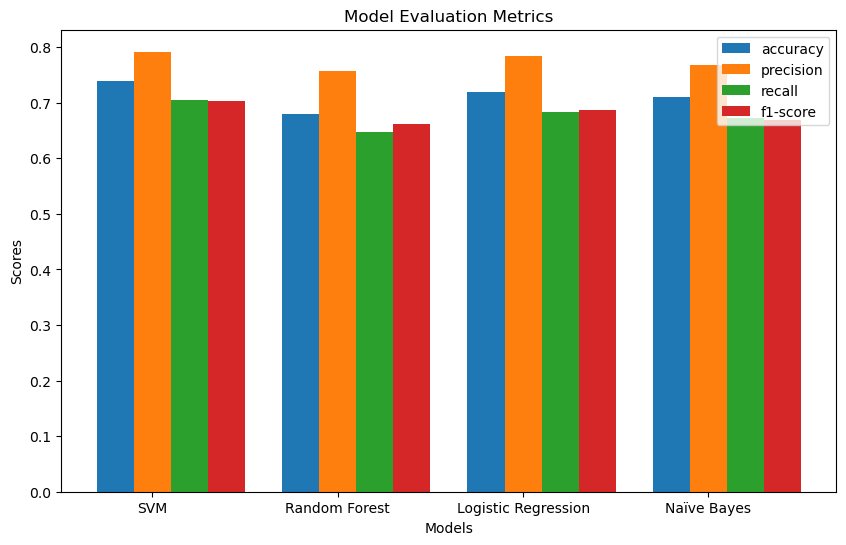

In [204]:
#Training the Models, Evaluate Performance and visualization 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# Define models
models = {
    "SVM": SVC(kernel='linear', C=1, gamma='scale'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42),
    "Naïve Bayes": MultinomialNB()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        "accuracy": accuracy,
        "precision": np.mean([report[label]["precision"] for label in report if label in ['negative', 'neutral', 'positive']]),
        "recall": np.mean([report[label]["recall"] for label in report if label in ['negative', 'neutral', 'positive']]),
        "f1-score": np.mean([report[label]["f1-score"] for label in report if label in ['negative', 'neutral', 'positive']])
    }
    
    print(f"=== {name} Model Performance ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Convert results to a dictionary for visualization
metrics = ["accuracy", "precision", "recall", "f1-score"]
scores = {metric: [results[model][metric] for model in results] for metric in metrics}

# Visualization
x_labels = list(models.keys())
x = np.arange(len(x_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, scores[metric], width, label=metric)

ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Model Evaluation Metrics")
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)
ax.legend()
plt.show()


In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize SVM model
svm_model = SVC()

# Perform Grid Search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train final model with best parameters
best_svm = SVC(**grid_search.best_params_)
best_svm.fit(X_train_tfidf, y_train)

# Evaluate on test data
y_pred = best_svm.predict(X_test_tfidf)
from sklearn.metrics import classification_report, accuracy_score

print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy: 0.6514873417721521
Optimized SVM Accuracy: 0.75
              precision    recall  f1-score   support

    negative       0.92      0.41      0.56        27
     neutral       0.71      0.93      0.80        40
    positive       0.75      0.82      0.78        33

    accuracy                           0.75       100
   macro avg       0.79      0.72      0.72       100
weighted avg       0.78      0.75      0.73       100



In [208]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)  # Encode test labels

# Initialize and train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_tfidf, y_train_encoded)

# Make predictions (numerical values)
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Convert predictions back to original labels
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate performance
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_labels))
print(classification_report(y_test, y_pred_xgb_labels))


XGBoost Accuracy: 0.68
              precision    recall  f1-score   support

    negative       0.71      0.44      0.55        27
     neutral       0.60      0.85      0.70        40
    positive       0.85      0.67      0.75        33

    accuracy                           0.68       100
   macro avg       0.72      0.65      0.66       100
weighted avg       0.71      0.68      0.67       100



In [210]:
#lets try to optimize (XGBoost)
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],  
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [3, 5, 7],  
    'subsample': [0.7, 1.0]  
}

# Initialize model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train_encoded)

# Get Best Model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate Optimized Model
y_pred_xgb_opt = best_xgb.predict(X_test_tfidf)
y_pred_xgb_labels_opt = label_encoder.inverse_transform(y_pred_xgb_opt)

print("Optimized XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_labels_opt))
print(classification_report(y_test, y_pred_xgb_labels_opt))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Optimized XGBoost Accuracy: 0.63
              precision    recall  f1-score   support

    negative       0.60      0.44      0.51        27
     neutral       0.57      0.88      0.69        40
    positive       0.84      0.48      0.62        33

    accuracy                           0.63       100
   macro avg       0.67      0.60      0.61       100
weighted avg       0.67      0.63      0.62       100



In [212]:
# because the dataset is very small this is the best accuracy you can get (svm with 75%)
#lests save the model
import joblib

# Save the trained SVM model
joblib.dump(svm_model, 'svm_model.pkl')
print("Model saved successfully!")


Model saved successfully!
